In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [34]:
df = pd.read_csv('merged.csv', index_col = [0])

In [35]:
df.head()

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016-01-01,1,2016,1,SEA,JFK,1,741.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016-01-01,1,2016,1,SEA,SFO,1,759.0,1.0,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016-01-01,1,2016,1,SEA,LAX,1,705.0,0.0,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016-01-01,1,2016,1,SEA,IAH,1,740.0,0.0,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016-01-01,1,2016,1,SEA,ATL,1,742.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA


In [36]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

In [51]:
df[df['ArrDel15'] == 1.0]['ArrDelayMinutes'].value_counts().sort_values()

1209.0        1
1351.0        1
623.0         1
1166.0        1
729.0         1
          ...  
19.0      10566
18.0      11359
17.0      11929
16.0      12476
15.0      13314
Name: ArrDelayMinutes, Length: 1059, dtype: int64

In [29]:
df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDel15', 'time', 'Quarter'])

In [30]:
df = df[df['ArrDelayMinutes'] > 15]

In [31]:
df = df.reset_index()

In [32]:
df = df.drop('index', axis = 1)

In [33]:
df

,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,ArrDelayMinutes,...,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,humidity
0,2016,1,SEA,SFO,1,759.0,1.0,724,35.0,24.0,...,107,113,0.0,10,1030,0,23,8,34,66
1,2016,1,SEA,LAS,1,745.0,1.0,705,40.0,37.0,...,107,113,0.0,10,1030,0,23,8,34,66
2,2016,1,SEA,LAX,2,720.0,1.0,655,25.0,46.0,...,119,113,0.0,10,1024,0,24,8,36,64
3,2016,1,SEA,LAX,2,730.0,0.0,730,0.0,21.0,...,119,113,0.0,10,1024,0,24,8,36,64
4,2016,1,SEA,ATL,2,745.0,0.0,745,0.0,22.0,...,119,113,0.0,10,1024,0,24,8,36,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372400,2017,9,JFK,LAX,21,2358.0,1.0,2245,73.0,51.0,...,28,122,0.0,10,1015,96,64,26,72,75
372401,2017,9,MCO,JFK,22,2021.0,1.0,1954,27.0,18.0,...,66,116,0.6,9,1013,20,73,24,79,80
372402,2017,9,MCO,EWR,22,2240.0,1.0,2140,60.0,57.0,...,65,116,0.0,9,1013,19,73,23,78,84
372403,2017,9,MCO,JFK,24,1948.0,0.0,1954,0.0,38.0,...,45,113,0.0,10,1012,14,71,19,82,71


In [11]:
df['ArrDelayMinutes'].describe()

count    372405.000000
mean         64.560656
std          72.561821
min          16.000000
25%          25.000000
50%          41.000000
75%          77.000000
max        2142.000000
Name: ArrDelayMinutes, dtype: float64

In [12]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])

In [13]:
X = df.drop('ArrDelayMinutes', axis = 1)
y = df['ArrDelayMinutes']

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
mae_l = []
mse_l = []
rmse_l = []
rsquared_l = []
def print_results(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = mse ** 0.5  
    r2 = r2_score(ytest, ypred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    rsquared_l.append(r2)

    print("Results from sklearn.metrics:")
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-Squared: ", r2)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Linear Regression Results')
print_results(y_test, y_pred)

Linear Regression Results
Results from sklearn.metrics:
MAE:  12.437576235968542
MSE:  321.759031462691
RMSE:  17.937642862502614
R-Squared:  0.9381807528046207


##### LR Result  Analysis
Upon comparing these metrics with information about the target variable, it appears that the Linear Regression model is delivering satisfactory performance. The target variable, "ArrDelayMinutes," possesses an average of 37.70 and spans from 1 to 2142. Within this context, the RMSE value of 15.66 and an R-squared value of 0.93 suggest that the model's predictions closely align with the actual values. 

In [17]:
et_reg = ExtraTreesRegressor(n_jobs = -1)
et_reg.fit(X_train, y_train)
y_pred = et_reg.predict(X_test)
print('Extra Tree Regressor Results')
print_results(y_test, y_pred)

Extra Tree Regressor Results
Results from sklearn.metrics:
MAE:  12.112485589230412
MSE:  297.354969124031
RMSE:  17.243983563087475
R-Squared:  0.9428694813709235


In [18]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print('Decision Tree Regressor Results')
print_results(y_test, y_pred)

Decision Tree Regressor Results
Results from sklearn.metrics:
MAE:  16.915853636705393
MSE:  608.0145987361486
RMSE:  24.65795203856453
R-Squared:  0.8831827513689303


In [19]:
dt_reg = RandomForestRegressor(n_jobs = -1)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print('Random Forest Regressor Results')
print_results(y_test, y_pred)

Random Forest Regressor Results
Results from sklearn.metrics:
MAE:  12.013323030762582
MSE:  291.51090117596675
RMSE:  17.073690320957763
R-Squared:  0.9439922964150441


In [20]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
print('XGBoost Regressor Results')
print_results(y_test, y_pred)

XGBoost Regressor Results
Results from sklearn.metrics:
MAE:  11.42154999743539
MSE:  272.1133427865254
RMSE:  16.495858352523683
R-Squared:  0.9477191302870025


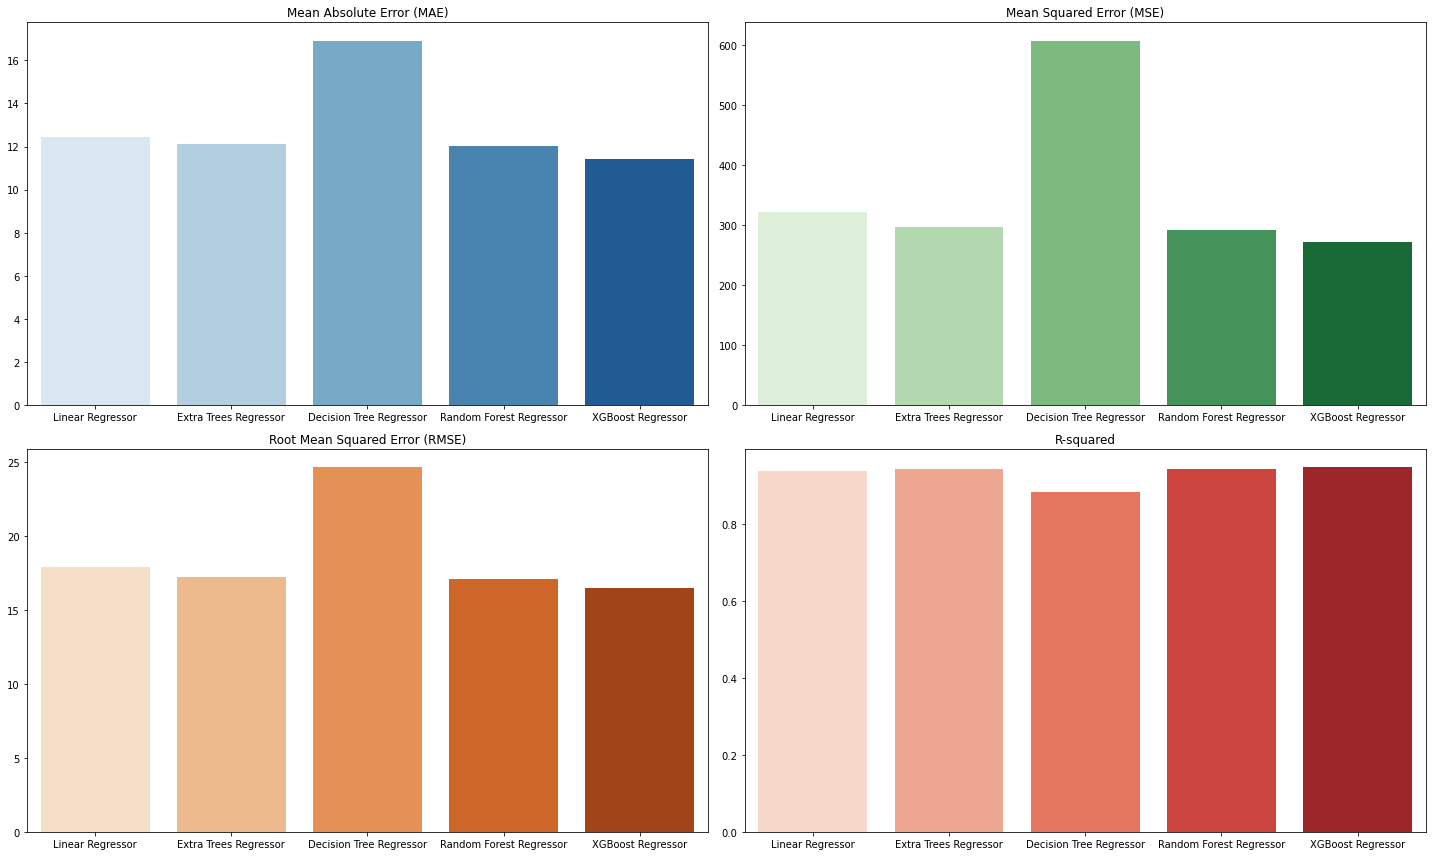

In [22]:
import seaborn as sns
model_names = ['Linear Regressor', 'Extra Trees Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor']


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 12))

sns.barplot(x = model_names, y = mae_l, palette = "Blues", ax = ax[0, 0])
ax[0, 0].set_title("Mean Absolute Error (MAE)")

sns.barplot(x = model_names, y = mse_l, palette = "Greens", ax = ax[0, 1])
ax[0, 1].set_title("Mean Squared Error (MSE)")

sns.barplot(x = model_names, y = rmse_l, palette = "Oranges", ax = ax[1, 0])
ax[1, 0].set_title("Root Mean Squared Error (RMSE)")

sns.barplot(x = model_names, y = rsquared_l, palette = "Reds", ax = ax[1, 1])
ax[1, 1].set_title("R-squared")

plt.tight_layout()

plt.show()


In [52]:
# Exporting Models
import pickle as pkl

In [54]:
pkl.dump(xgb_reg, open('xgb_reg.pkl', 'wb'))